<a href="https://colab.research.google.com/github/alexalathom/SQL-Lab-1/blob/main/Copy_of_superhero_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [8]:
import sqlite3

# Create or connect to an SQLite database
connection = sqlite3.connect('superhero_db.sqlite')

# Check if the connection was successful
print("Database created and connected!")

Database created and connected!


In [9]:
# Create a cursor object
cursor = connection.cursor()

# Explanation
print("Cursor created!")

Cursor created!


In [10]:
# Create the heroes table
cursor.execute('''
CREATE TABLE IF NOT EXISTS heroes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    power TEXT NOT NULL,
    team TEXT NOT NULL
)
''')

print("Heroes table created!")


Heroes table created!


In [25]:
# Create the villains table
cursor.execute('''
CREATE TABLE IF NOT EXISTS villains (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    evil_plan TEXT NOT NULL
)
''')

print("Villains table created!")


Villains table created!


In [26]:
# Create the battles table
cursor.execute('''
CREATE TABLE IF NOT EXISTS battles (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER,
    villain_id INTEGER,
    outcome TEXT NOT NULL
)
''')

print("Battles table created!")


Battles table created!


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [27]:
import pandas as pd

# Load data from CSV into a DataFrame
df_heroes = pd.read_csv('heroes.csv')

# Display the first few rows of the DataFrame
print(df_heroes.head())


   id        name             power            team
0   1  Spider-Man      Web-slinging        Avengers
1   2    Iron Man     Powered Armor        Avengers
2   3      Batman  Genius Detective  Justice League
3   4    Superman    Super Strength  Justice League
4   5        Thor    God of Thunder        Avengers


In [28]:
# Fetch all data from the heroes table
df_heroes.to_sql('heroes', connection, if_exists='replace', index=False)

cursor.execute("SELECT * FROM heroes")
rows = cursor.fetchall()

# Print the results
print("All heroes data:")
for row in rows:
    print(row)

All heroes data:
(1, 'Spider-Man', 'Web-slinging', 'Avengers')
(2, 'Iron Man', 'Powered Armor', 'Avengers')
(3, 'Batman', 'Genius Detective', 'Justice League')
(4, 'Superman', 'Super Strength', 'Justice League')
(5, 'Thor', 'God of Thunder', 'Avengers')
(6, 'Wonder Woman', 'Amazonian Strength', 'Justice League')
(7, 'Black Panther', 'Enhanced Agility', 'Avengers')
(8, 'The Flash', 'Super Speed', 'Justice League')
(9, 'Hulk', 'Super Strength', 'Avengers')
(10, 'Doctor Strange', 'Mystic Arts', 'Avengers')


In [29]:
# Load data from CSV into a DataFrame
df_villains = pd.read_csv('villains.csv')

# Display the first few rows of the DataFrame
print(df_villains.head())

   id          name                           evil_plan
0   1  Green Goblin                  Terrorize New York
1   2        Thanos         Collect all Infinity Stones
2   3         Joker              Spread chaos in Gotham
3   4    Lex Luthor                     Defeat Superman
4   5          Loki  Trick humanity into worshiping him


In [37]:
# Fetch all data from the villains table
df_villains.to_sql('villains', connection, if_exists='replace', index=False)

cursor.execute("SELECT * FROM villains")
rows = cursor.fetchall()

# Print the results
print("All villains data:")
for row in rows:
    print(row)

All villains data:
(1, 'Green Goblin', 'Terrorize New York')
(2, 'Thanos', 'Collect all Infinity Stones')
(3, 'Joker', 'Spread chaos in Gotham')
(4, 'Lex Luthor', 'Defeat Superman')
(5, 'Loki', 'Trick humanity into worshiping him')
(6, 'Ultron', 'AI world domination')
(7, 'Darkseid', 'Control the universe')
(8, 'Venom', 'Consume Spider-Man')
(9, 'Magneto', 'Mutant supremacy')
(10, 'Red Skull', 'Revive Hydra')


In [38]:
# Load data from CSV into a DataFrame
df_battles = pd.read_csv('battles.csv')

# Display the first few rows of the DataFrame
print(df_battles.head())

   id  hero_id  villain_id       outcome
0   1        1          10  Villain Wins
1   2        9           3     Hero Wins
2   3        8           1          Draw
3   4        5           4  Villain Wins
4   5        1           7     Hero Wins


In [39]:
# Fetch all data from the battles table
df_battles.to_sql('battles', connection, if_exists='replace', index=False)

cursor.execute("SELECT * FROM battles")
rows = cursor.fetchall()

# Print the results
print("All battles data:")
for row in rows:
    print(row)

All battles data:
(1, 1, 10, 'Villain Wins')
(2, 9, 3, 'Hero Wins')
(3, 8, 1, 'Draw')
(4, 5, 4, 'Villain Wins')
(5, 1, 7, 'Hero Wins')
(6, 2, 8, 'Villain Wins')
(7, 9, 8, 'Hero Wins')
(8, 3, 2, 'Hero Wins')
(9, 7, 5, 'Hero Wins')
(10, 3, 1, 'Draw')
(11, 1, 8, 'Villain Wins')
(12, 2, 1, 'Draw')
(13, 8, 9, 'Hero Wins')
(14, 8, 1, 'Draw')
(15, 6, 10, 'Draw')
(16, 1, 1, 'Villain Wins')
(17, 8, 3, 'Draw')
(18, 6, 3, 'Villain Wins')
(19, 4, 8, 'Villain Wins')
(20, 3, 4, 'Hero Wins')
(21, 8, 1, 'Draw')
(22, 4, 9, 'Draw')
(23, 3, 9, 'Draw')
(24, 8, 9, 'Villain Wins')
(25, 2, 5, 'Draw')
(26, 3, 7, 'Draw')
(27, 10, 3, 'Draw')
(28, 3, 8, 'Draw')
(29, 3, 5, 'Hero Wins')
(30, 5, 5, 'Hero Wins')


## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [40]:
# Execute the query to retrieve all superheroes and their powers
cursor.execute("SELECT name, power FROM heroes")

# Fetch all results
heroes_data = cursor.fetchall()

# Print the results
print("Superheroes and their powers:")
for hero in heroes_data:
    print(f"Name: {hero[0]}, Power: {hero[1]}")

Superheroes and their powers:
Name: Spider-Man, Power: Web-slinging
Name: Iron Man, Power: Powered Armor
Name: Batman, Power: Genius Detective
Name: Superman, Power: Super Strength
Name: Thor, Power: God of Thunder
Name: Wonder Woman, Power: Amazonian Strength
Name: Black Panther, Power: Enhanced Agility
Name: The Flash, Power: Super Speed
Name: Hulk, Power: Super Strength
Name: Doctor Strange, Power: Mystic Arts


In [41]:
# Execute the query to find battles where the hero won
cursor.execute("SELECT * FROM battles WHERE outcome = 'Hero Wins'")

# Fetch all results
hero_wins = cursor.fetchall()

# Print the results
print("Battles where the hero won:")
for battle in hero_wins:
    print(f"Battle ID: {battle[0]}, Hero ID: {battle[1]}, Villain ID: {battle[2]}, Outcome: {battle[3]}")

Battles where the hero won:
Battle ID: 2, Hero ID: 9, Villain ID: 3, Outcome: Hero Wins
Battle ID: 5, Hero ID: 1, Villain ID: 7, Outcome: Hero Wins
Battle ID: 7, Hero ID: 9, Villain ID: 8, Outcome: Hero Wins
Battle ID: 8, Hero ID: 3, Villain ID: 2, Outcome: Hero Wins
Battle ID: 9, Hero ID: 7, Villain ID: 5, Outcome: Hero Wins
Battle ID: 13, Hero ID: 8, Villain ID: 9, Outcome: Hero Wins
Battle ID: 20, Hero ID: 3, Villain ID: 4, Outcome: Hero Wins
Battle ID: 29, Hero ID: 3, Villain ID: 5, Outcome: Hero Wins
Battle ID: 30, Hero ID: 5, Villain ID: 5, Outcome: Hero Wins


In [42]:
# Execute the query to retrieve all villains and their evil plans
cursor.execute("SELECT name, evil_plan FROM villains")

# Fetch all results
villains_data = cursor.fetchall()

# Print the results
print("Villains and their evil plans:")
for villain in villains_data:
    print(f"Name: {villain[0]}, Evil Plan: {villain[1]}")

Villains and their evil plans:
Name: Green Goblin, Evil Plan: Terrorize New York
Name: Thanos, Evil Plan: Collect all Infinity Stones
Name: Joker, Evil Plan: Spread chaos in Gotham
Name: Lex Luthor, Evil Plan: Defeat Superman
Name: Loki, Evil Plan: Trick humanity into worshiping him
Name: Ultron, Evil Plan: AI world domination
Name: Darkseid, Evil Plan: Control the universe
Name: Venom, Evil Plan: Consume Spider-Man
Name: Magneto, Evil Plan: Mutant supremacy
Name: Red Skull, Evil Plan: Revive Hydra


In [43]:
# Execute the query to find the superhero with the most battles
cursor.execute("""
    SELECT heroes.name, COUNT(battles.hero_id) AS battle_count
    FROM battles
    JOIN heroes ON battles.hero_id = heroes.id
    GROUP BY battles.hero_id
    ORDER BY battle_count DESC
    LIMIT 1;
""")

# Fetch the result
most_battles = cursor.fetchone()

# Print the result
if most_battles:
    print(f"Superhero with the most battles: {most_battles[0]} with {most_battles[1]} battles.")
else:
    print("No battles found.")

Superhero with the most battles: Batman with 7 battles.


## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [45]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS sidekicks (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER,
    sidekick_name TEXT NOT NULL,
    sidekick_power TEXT NOT NULL,
    FOREIGN KEY (hero_id) REFERENCES heroes(id)
)
''')

print("Sidekicks table created!")

Sidekicks table created!


In [46]:
sidekick_data = [
    (1, "Cobra", "Acrobatics"),  # Batman's sidekick
    (4, "Wolf", "Super Strength"),  # Hulk's sidekick
    (8, "Phantom", "Invisibility"),  # The Flash's sidekick
    (3, "Spider", "Elasticity"),  # Iron Man's sidekick
    (7, "Echo", "Telepathy")  # Wonder Woman's sidekick
]

cursor.executemany("INSERT INTO sidekicks (hero_id, sidekick_name, sidekick_power) VALUES (?, ?, ?)", sidekick_data)

connection.commit()
print("Sidekicks data inserted successfully!")


Sidekicks data inserted successfully!


In [47]:
cursor.execute('''
SELECT heroes.name AS hero, sidekicks.sidekick_name, sidekicks.sidekick_power
FROM sidekicks
JOIN heroes ON sidekicks.hero_id = heroes.id
''')

sidekick_results = cursor.fetchall()

print("Superheroes and their sidekicks:")
for row in sidekick_results:
    print(f"Hero: {row[0]}, Sidekick: {row[1]}, Sidekick Power: {row[2]}")

Superheroes and their sidekicks:
Hero: Spider-Man, Sidekick: Cobra, Sidekick Power: Acrobatics
Hero: Superman, Sidekick: Wolf, Sidekick Power: Super Strength
Hero: The Flash, Sidekick: Phantom, Sidekick Power: Invisibility
Hero: Batman, Sidekick: Spider, Sidekick Power: Elasticity
Hero: Black Panther, Sidekick: Echo, Sidekick Power: Telepathy


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

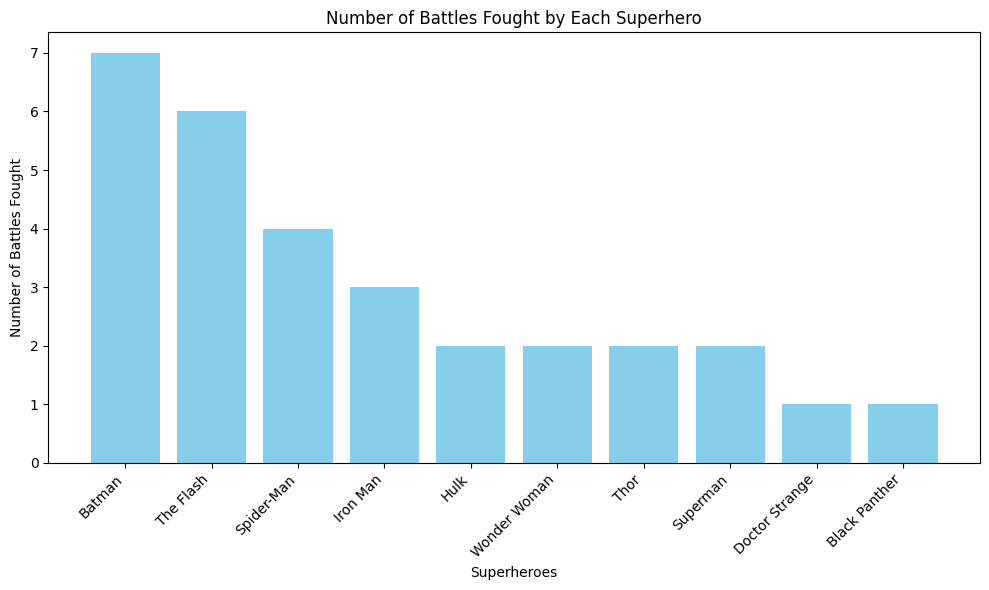

In [48]:
import matplotlib.pyplot as plt
import sqlite3

# Connect to the database
connection = sqlite3.connect('superhero_db.sqlite')
cursor = connection.cursor()

# Query to get the number of battles each superhero has fought
cursor.execute('''
    SELECT h.name, COUNT(b.hero_id) AS battle_count
    FROM heroes h
    LEFT JOIN battles b ON h.id = b.hero_id
    GROUP BY h.id
    ORDER BY battle_count DESC
''')

# Fetch results
battle_data = cursor.fetchall()

# Separate the names and battle counts
hero_names = [data[0] for data in battle_data]
battle_counts = [data[1] for data in battle_data]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(hero_names, battle_counts, color='skyblue')
plt.xlabel('Superheroes')
plt.ylabel('Number of Battles Fought')
plt.title('Number of Battles Fought by Each Superhero')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!